In [116]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.losses import *
import torch.nn
import torchvision.models as models
import tensorflow as tf
import matplotlib.pyplot as plt
from random import *
import numpy as np

In [100]:
(x_vals, y_vals), (x_test, y_test) = cifar10.load_data()
height = 32
width = 32
channels = 3
nb = 10
clamp = 255
labelsCIFAR = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
x_vals = x_vals / clamp
x_test = x_test / clamp
x_vals = x_vals.reshape((-1, height, width, channels))
x_test = x_test.reshape((-1, height, width, channels))
y_vals = tf.keras.utils.to_categorical(y_vals, nb)
y_test = tf.keras.utils.to_categorical(y_test, nb)
print(x_vals, x_test, y_vals, y_test)

[[[[0.23137255 0.24313725 0.24705882]
   [0.16862745 0.18039216 0.17647059]
   [0.19607843 0.18823529 0.16862745]
   ...
   [0.61960784 0.51764706 0.42352941]
   [0.59607843 0.49019608 0.4       ]
   [0.58039216 0.48627451 0.40392157]]

  [[0.0627451  0.07843137 0.07843137]
   [0.         0.         0.        ]
   [0.07058824 0.03137255 0.        ]
   ...
   [0.48235294 0.34509804 0.21568627]
   [0.46666667 0.3254902  0.19607843]
   [0.47843137 0.34117647 0.22352941]]

  [[0.09803922 0.09411765 0.08235294]
   [0.0627451  0.02745098 0.        ]
   [0.19215686 0.10588235 0.03137255]
   ...
   [0.4627451  0.32941176 0.19607843]
   [0.47058824 0.32941176 0.19607843]
   [0.42745098 0.28627451 0.16470588]]

  ...

  [[0.81568627 0.66666667 0.37647059]
   [0.78823529 0.6        0.13333333]
   [0.77647059 0.63137255 0.10196078]
   ...
   [0.62745098 0.52156863 0.2745098 ]
   [0.21960784 0.12156863 0.02745098]
   [0.20784314 0.13333333 0.07843137]]

  [[0.70588235 0.54509804 0.37647059]
   [0.6

In [120]:
dimensionVal = -1
x = Sequential()
x.add(Conv2D(128, (3, 3), strides = (2, 2), padding = "same", input_shape = (height, width, channels)))
x.add(Activation("relu"))
x.add(Dropout(0.1))

x.add(Conv2D(64, (3, 3), strides = (2, 2), padding = "same", input_shape = (height, width, channels)))
x.add(Activation("relu"))
x.add(Dropout(0.1))

x.add(Conv2D(64, (3, 3), strides = (2, 2), padding = "same", input_shape = (height, width, channels)))
x.add(Activation("relu"))
x.add(Dropout(0.1))
x.add(MaxPooling2D(pool_size = (2, 2)))

x.add(Conv2D(64, (3, 3), strides = (2, 2), padding = "same", input_shape = (height, width, channels)))
x.add(Activation("relu"))
x.add(Dropout(0.1))
x.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = "same"))

x.add(Conv2D(64, (3, 3), strides = (2, 2), padding = "same", input_shape = (height, width, channels)))
x.add(Activation("relu"))
x.add(Dropout(0.1))
x.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = "same"))

x.add(Dropout(0.1))
x.add(Flatten())

x.add(Dense(10, activation = 'softmax'))
x.compile(optimizer = 'adam', loss = tf.keras.losses.BinaryCrossentropy(), metrics = ['accuracy'])




In [121]:
history = x.fit(x_vals, y_vals, batch_size = 16, epochs = 10, validation_data = (x_test, y_test))

Epoch 1/10
3125/3125 [==============================] - 21s 6ms/step - loss: 0.2803 - accuracy: 0.3004 - val_loss: 0.2311 - val_accuracy: 0.4505
Epoch 2/10
3125/3125 [==============================] - 20s 6ms/step - loss: 0.2323 - accuracy: 0.4496 - val_loss: 0.2138 - val_accuracy: 0.4957
Epoch 3/10
3125/3125 [==============================] - 19s 6ms/step - loss: 0.2128 - accuracy: 0.5082 - val_loss: 0.1953 - val_accuracy: 0.5539
Epoch 4/10
3125/3125 [==============================] - 19s 6ms/step - loss: 0.2015 - accuracy: 0.5395 - val_loss: 0.1914 - val_accuracy: 0.5655
Epoch 5/10
3125/3125 [==============================] - 19s 6ms/step - loss: 0.1928 - accuracy: 0.5642 - val_loss: 0.1813 - val_accuracy: 0.5865
Epoch 6/10
3125/3125 [==============================] - 19s 6ms/step - loss: 0.1854 - accuracy: 0.5829 - val_loss: 0.1750 - val_accuracy: 0.6095
Epoch 7/10
3125/3125 [==============================] - 19s 6ms/step - loss: 0.1800 - accuracy: 0.6001 - val_loss: 0.1709 - val_ac

Text(0.5, 1.0, 'Accuracy of the Neural Network')

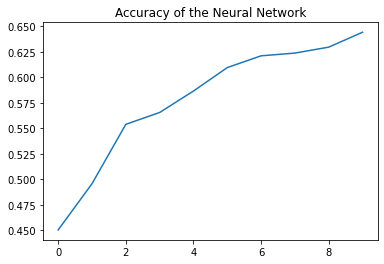

In [122]:
plt.plot(history.history['val_accuracy'], label = 'accuracy')
plt.title("Accuracy of the Neural Network")

Text(0.5, 1.0, 'Loss in the Neural Network')

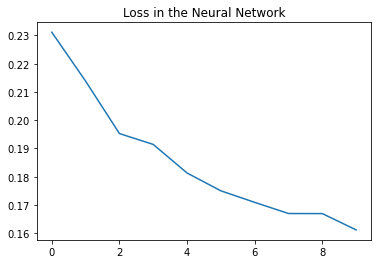

In [123]:
plt.plot(history.history['val_loss'], label = 'loss')
plt.title("Loss in the Neural Network")

Prediction from CNN: ship


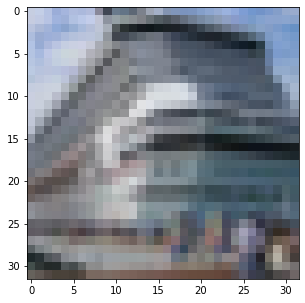

In [133]:
randImage = randint(0, 49999)
image = x_vals[randImage].reshape((1, height, width, channels))
label = y_vals[randImage]
print(f"Prediction from CNN: {labelsCIFAR[np.where(label == 1)[0][0]]}")
plt.figure(figsize = (5, 5))
plt.imshow(image.reshape((height, width, channels)))
plt.show()

In [134]:
def adversary_create(image, label):
    image = tf.cast(image, tf.float32)
    with tf.GradientTape() as t:
        t.watch(image)
        prediction = x(image)
        ls = MSE(label, prediction)
    grad = t.gradient(ls, image)
    signedGrad = tf.sign(grad)
    return signedGrad

In [135]:
noise = adversary_create(image, label).numpy()
ad_picture = image + (noise * 0.05)

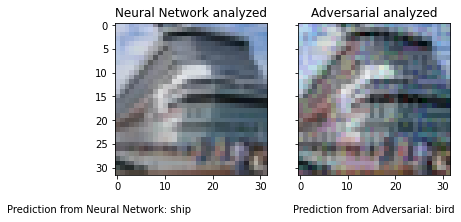

In [136]:
randImage = randint(0, 49999)
picture, (nnPic, adPic) = plt.subplots(1, 2, sharey = True)
nnPic.imshow(image.reshape(height, width, channels))
nnPic.set_title("Neural Network analyzed")
nnPic.text(0.5, -0.25, f"Prediction from Neural Network: {labelsCIFAR[x.predict(image).argmax()]}", ha = 'right', transform = nnPic.transAxes)
adPic.imshow(ad_picture.reshape(height, width, channels))
adPic.set_title("Adversarial analyzed")
adPic.text(0.5, -0.25, f"Prediction from Adversarial: {labelsCIFAR[x.predict(ad_picture).argmax()]}", ha = 'center', transform = adPic.transAxes)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Picture of the Noise Present')

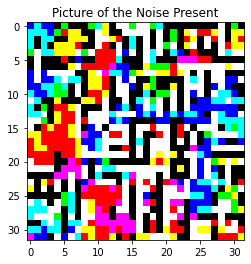

In [153]:
plt.imshow(noise[0])
plt.title("Picture of the Noise Present")

In [154]:
def adversary_generator(batch_size):
    while True:
        arrIm = []
        arrL = []
        for element in range(batch_size):
            rand = randint(0, 49999)
            label = y_vals[rand]
            image = x_vals[rand].reshape((1, height, width, channels))
            arrIm.append(ad_picture)
            arrL.append(label)
        arrIm = np.asarray(arrIm).reshape((batch_size, height, width, channels))
        arrL = np.asarray(arrL)
        yield arrIm, arrL

In [155]:
x_ad, y_ad = next(adversary_generator(5000))
accuracy = x.evaluate(x_ad, y_ad)
print(f"Accuracy of Network after FGSM attack: {accuracy[1]}")

157/157 [==============================] - 1s 5ms/step - loss: 0.4191 - accuracy: 0.0964
Accuracy of Network after FGSM attack: 0.09640000015497208
